![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Metaheurísticas

## Hill Climbing

### Professor: Felipe Reis


---
### Informações Iniciais

O presente tutorial tem como objetivo estudar os seguintes algoritmos:

* Hill Climbing
* Steepest Ascent Hill Climbing
* Hill Climbing with Random Restart

#### Referências

O tutorial abaixo foi inspirado nas seguintes links:

* LUKE, Sean. **Essentials of Metaheuristics (Second Edition).**. 2013. Lulu. Disponível em: https://cs.gmu.edu/~sean/book/metaheuristics/.

* LUZIA, L. F. and Rodrigues, M. C. **Estudo sobre as metaheurísticas**. 2009. Disponível em: https://www.ime.usp.br/~gold/cursos/2009/mac5758/LeandroMauricioHeuristica.pdf.

* BROWNLEE, Jason. **Stochastic Hill Climbing in Python from Scratch.**. 2020. Disponível em: https://machinelearningmastery.com/stochastic-hill-climbing-in-python-from-scratch/

* DE HANN, Hein. **How to Implement the Hill Climbing Algorithm in Python**. 2020. Disponível em: https://towardsdatascience.com/how-to-implement-the-hill-climbing-algorithm-in-python-1c65c29469de

### Importação de bibliotecas 

In [44]:
import numpy as np
import numpy.random as rd
import operator 
import matplotlib.pyplot as plt

In [45]:
def imprime_funcao(interv, f_, titulo=''):
    plt.rcParams["figure.figsize"] = (10,10)
    plt.rcParams["axes.labelsize"] = 14
    plt.rcParams["axes.titlesize"] = 24

    plt.plot(interv, f_(interv))

    plt.title(titulo)
    plt.grid(); 
    plt.show()

In [46]:
def imprime_grafico(values, scores):
    plt.rcParams["figure.figsize"] = (10,10)
    plt.plot(values, scores, 'x')

    plt.rcParams["axes.titlesize"] = 24
    plt.grid(); 
    plt.show()

In [47]:
def imprime_histograma(scores):
    plt.hist(scores, bins='auto', alpha=0.7, rwidth=0.85)

In [106]:
def imprime_3d(f_, x=None, y=None):
    if(x == None and y == None):
        x = np.linspace(-10, 10, 1000)
        y = np.linspace(-10, 10, 1000)

    xx, yy = np.meshgrid(x, y)
    zz = f_(xx, yy)

    plt.rcParams["figure.figsize"] = (15,15)
    fig = plt.figure()
    
    ax = plt.axes(projection ='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.plot_surface(xx, yy, zz)
    plt.show()

---
## Hill Climbing

### Problema 1: Mínimo de uma função

O mínimo de uma função de segundo grau será obtido pelo algoritmo de Hill-Climbing.

In [49]:
def f_prb1(x):
    return x**2.0

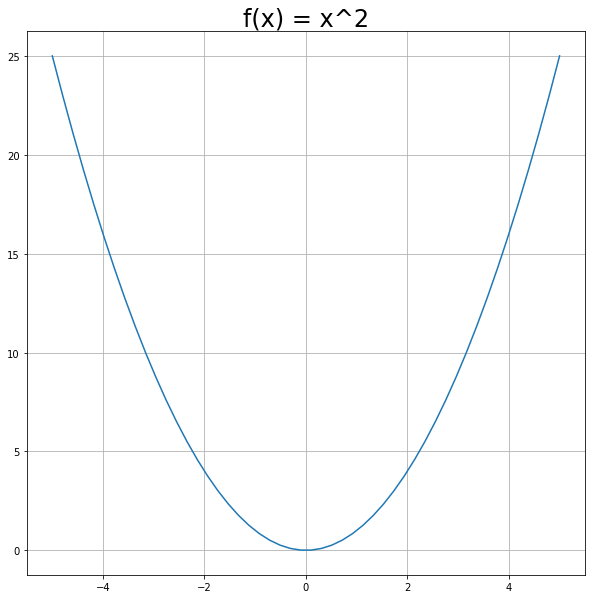

In [50]:
interv = np.linspace(-5,5)
imprime_funcao(interv, f_=f_prb1, titulo='f(x) = x^2')

In [51]:
def basic_hill_climbing(f_objetivo, intervalo, iteracoes, step_size):        
    #gera um valor aletório como primeira solução
    best_value = rd.uniform(intervalo[0], intervalo[1])
    
    # run the hill climb
    for i in range(iteracoes):
        candidate = best_value + (rd.uniform(-1, 1) * step_size)
        
        # verifica se o ponto atual é melhor que o anterior
        if f_objetivo(candidate) <= f_objetivo(best_value):
            best_value = candidate
            
    return best_value, f_objetivo(best_value)

In [52]:
# semente do método pseudoaleatório
# utilizada para que o algoritmo não gere valores distintos
np.random.seed(5)

# execução do  hill climbing search
best, score = basic_hill_climbing(f_objetivo=f_prb1, intervalo=[-5, 5], iteracoes=100, step_size=0.1)

#imprime melhor resultado
print('Melhor resultado')
print('f(%s) = %f' % (best, score))

Melhor resultado
f(-0.14528143205648664) = 0.021107


---
### Problema 2: Mínimo de uma função

O mínimo de uma função de segundo grau será obtido pelo algoritmo de Hill-Climbing.

Será utilizada a mesma função anterior, porém iremos verificar o comportamento do Hill-Climbing, utilizando um gráfico.

In [53]:
def hill_climbing(f_objetivo, intervalo, iteracoes, step_size, op=operator.le, save=True):        
    all_values = []
    
    #gera um valor aletório como primeira solução
    best_value = rd.uniform(intervalo[0], intervalo[1])
    
    if(save):
        all_values.append(best_value)
    
    # run the hill climb
    for i in range(iteracoes):
        candidate = best_value + (rd.uniform(-1, 1) * step_size)
        
        # verifica se o ponto atual é melhor que o anterior 
        # a operação é passada como parâmetro, para permitir 
        # o hill-climbing descendente e ascendente 
        if(op(f_objetivo(candidate), f_objetivo(best_value))):
            best_value = candidate
            
        if(save):
            all_values.append(candidate)
            
    return best_value, f_objetivo(best_value), all_values

In [54]:
# semente do método pseudoaleatório
# utilizada para que o algoritmo não gere valores distintos
np.random.seed(5)

# execução do  hill climbing search
best, score, values = hill_climbing(f_objetivo=f_prb1, intervalo=[-5, 5], 
                                    iteracoes=100, step_size=0.1, op=operator.le)

#imprime melhor resultado
print('Melhor resultado')
print('f(%s) = %f' % (best, score))

Melhor resultado
f(-0.14528143205648664) = 0.021107


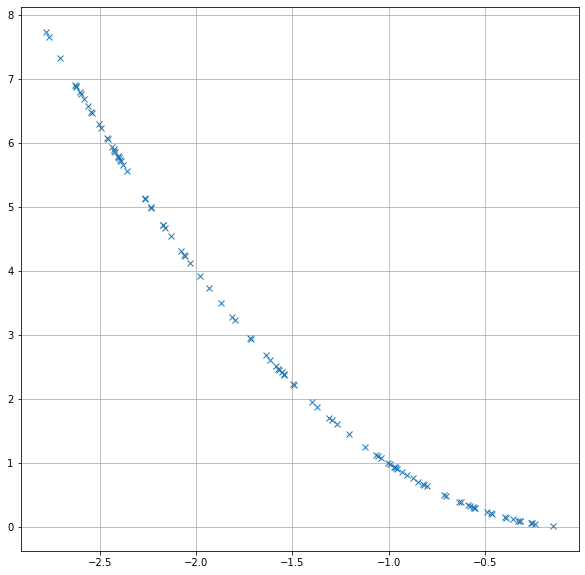

In [55]:
#imprime resultados
scores = list(map(lambda a: f_prb1(a), values))
imprime_grafico(values, scores)

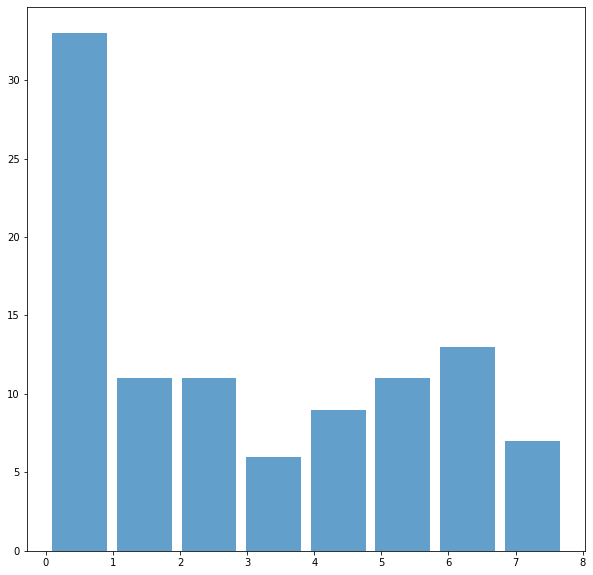

In [56]:
#imprime histograma
imprime_histograma(scores)

---
### Problema 3: Máximo de uma função

O máximo de uma função de segundo grau será obtido pelo algoritmo de Hill-Climbing.

In [57]:
def f_prb3(x):
    return -(x**2) + 5 

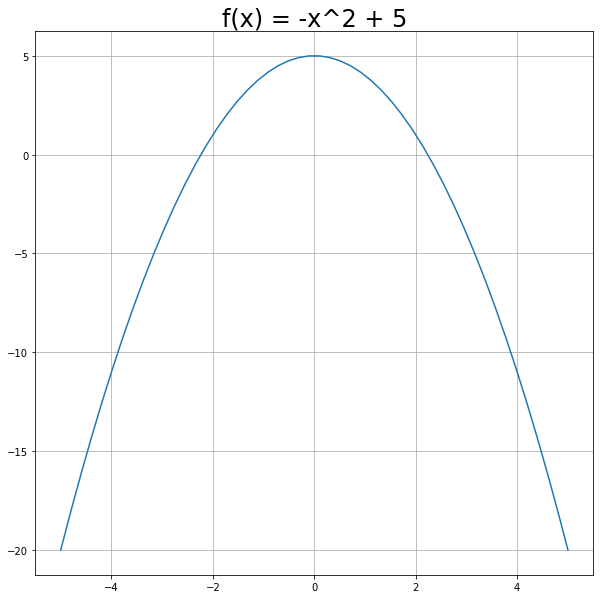

In [58]:
interv = np.linspace(-5,5)
imprime_funcao(interv, f_=f_prb3, titulo='f(x) = -x^2 + 5')

Best: f(-0.14528143205648664) = 4.978893


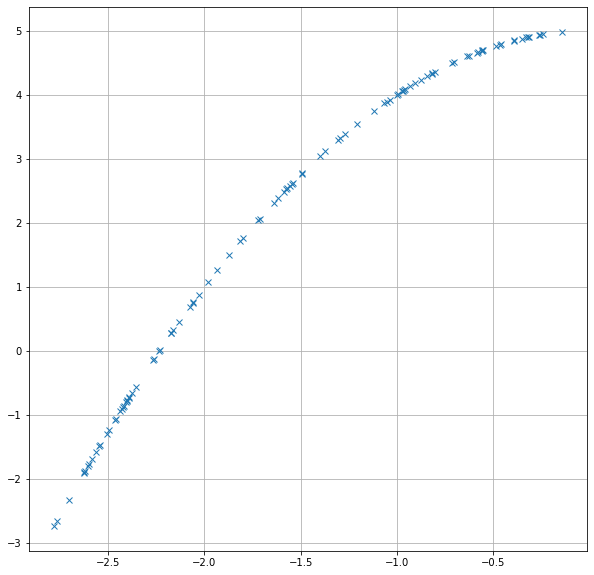

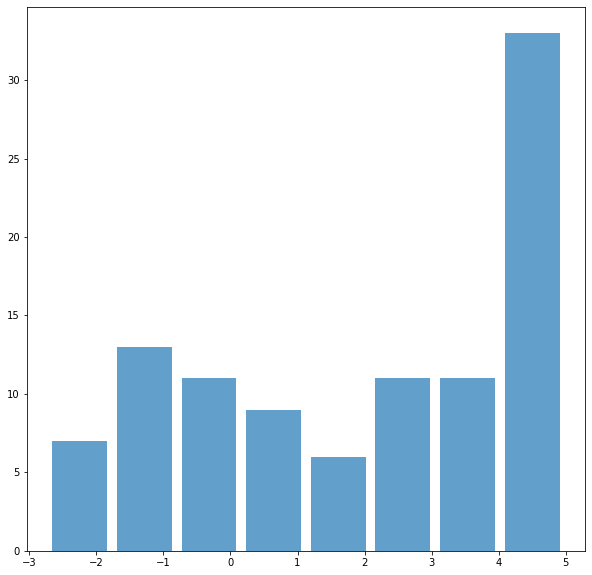

In [59]:
np.random.seed(5)

# execução do  hill climbing search
best, score, values = hill_climbing(f_objetivo=f_prb3, intervalo=[-5, 5], 
                                    iteracoes=100, step_size=0.1, op=operator.ge)

#imprime melhor resultado
print('Best: f(%s) = %f' % (best, score))

#imprime resultados
scores = list(map(lambda a: f_prb3(a), values))
imprime_grafico(values, scores)
imprime_histograma(scores)

---
### Problema 4: Máximo de 4o grau

O máximo de uma função de segundo grau será obtido pelo algoritmo de Hill-Climbing.

In [60]:
def f_prb4(x):
    return -(x**4) + (4*(x**3)) + (5*(x**2)) + 3

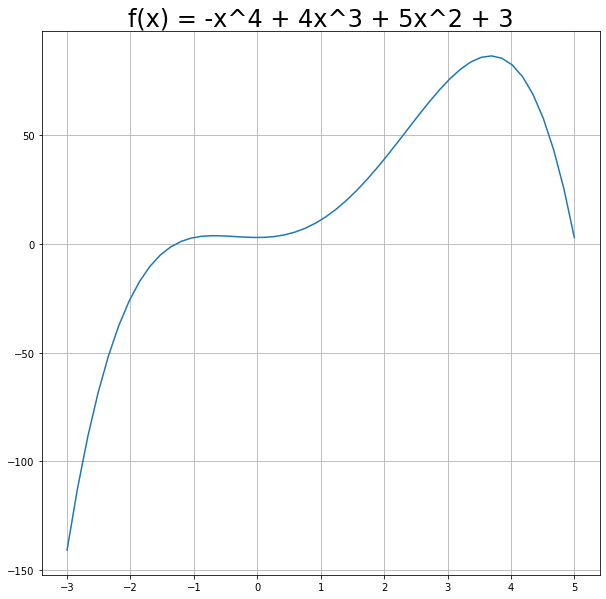

In [61]:
interv = np.linspace(-3,5)
imprime_funcao(interv, f_=f_prb4, titulo='f(x) = -x^4 + 4x^3 + 5x^2 + 3')

First: -1.224055
Best: f(-0.6794610769036605) = 3.840460


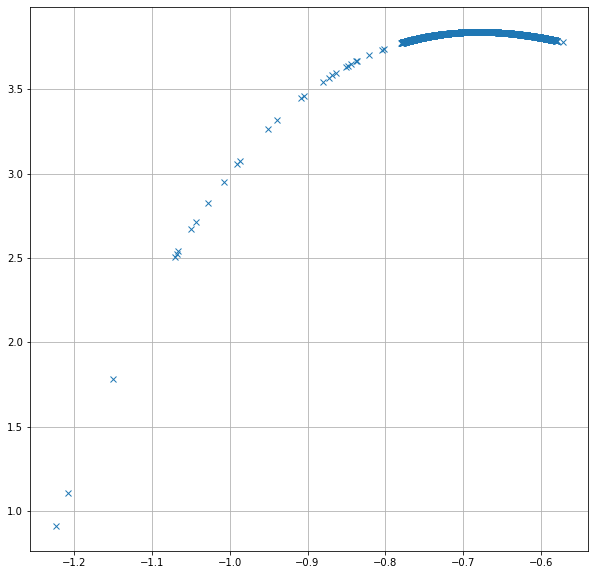

In [62]:
np.random.seed(5)

# execução do  hill climbing search
best, score, values = hill_climbing(f_objetivo=f_prb4, intervalo=[-3, 5], 
                                    iteracoes=1000, step_size=0.1, op=operator.ge)

#imprime melhor resultado
print('First: %f' % values[0])
print('Best: f(%s) = %f' % (best, score))

#imprime resultados
scores = list(map(lambda a: f_prb4(a), values))
imprime_grafico(values, scores)

Observe que ser alterarmos a semente dos números aleatórios, o valor do Hill-Climbing será melhor, uma vez que o processo iniciará em uma posição melhor do problema.

First: 4.142881
Best: f(3.6793583948362047) = 86.659540


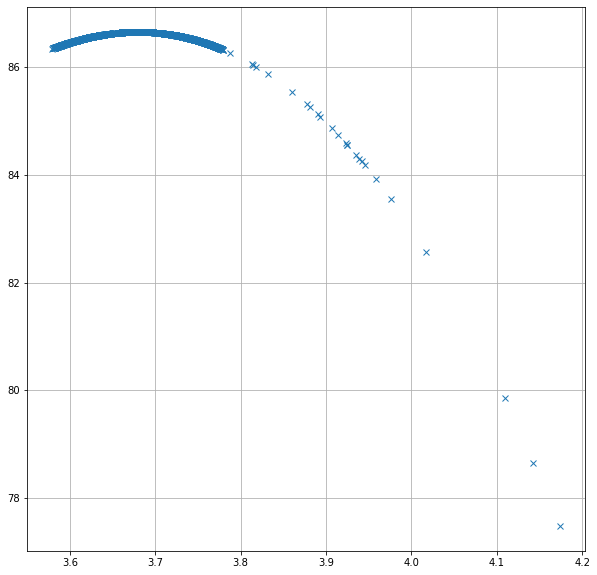

In [63]:
np.random.seed(6)

# execução do  hill climbing search
best, score, values = hill_climbing(f_objetivo=f_prb4, intervalo=[-3, 5], 
                                    op=operator.ge, iteracoes=1000, step_size=0.1)

#imprime melhor resultado
print('First: %f' % values[0])
print('Best: f(%s) = %f' % (best, score))

#imprime resultados
scores = list(map(lambda a: f_prb4(a), values))
imprime_grafico(values, scores)

---
## Estudo de Funções em 3 dimensões

Para que possamos entender o funcionamento dos algoritmos *Steepest Ascent Hill-Climbing* e *Steepest Ascent Hill-Climbing with Random Restart*, é necessário que estudemos funções um pouco mais complexas. Funções em duas dimensões necessitam de uma abstração maior, uma vez que as vantagens não ficam muito evidentes.

Para isso, iremos utilizar funções em 3 dimensões. Antes, entretanto, iremos avaliar diferentes funções em 3 dimensões.

In [64]:
def f_prb5_v1(x, y):
    return -(x**2) - (y**2)

In [65]:
x = np.linspace(-10, 10, 5)
y = np.linspace(-10, 10, 5)
xx, yy = np.meshgrid(x, y)
zz = f_prb5_v1(xx, yy)

print('x=', x)
print('y=', y)
print()
print('X=', xx)
print()
print('Y=',yy)
print()
print(zz)


x= [-10.  -5.   0.   5.  10.]
y= [-10.  -5.   0.   5.  10.]

X= [[-10.  -5.   0.   5.  10.]
 [-10.  -5.   0.   5.  10.]
 [-10.  -5.   0.   5.  10.]
 [-10.  -5.   0.   5.  10.]
 [-10.  -5.   0.   5.  10.]]

Y= [[-10. -10. -10. -10. -10.]
 [ -5.  -5.  -5.  -5.  -5.]
 [  0.   0.   0.   0.   0.]
 [  5.   5.   5.   5.   5.]
 [ 10.  10.  10.  10.  10.]]

[[-200. -125. -100. -125. -200.]
 [-125.  -50.  -25.  -50. -125.]
 [-100.  -25.   -0.  -25. -100.]
 [-125.  -50.  -25.  -50. -125.]
 [-200. -125. -100. -125. -200.]]


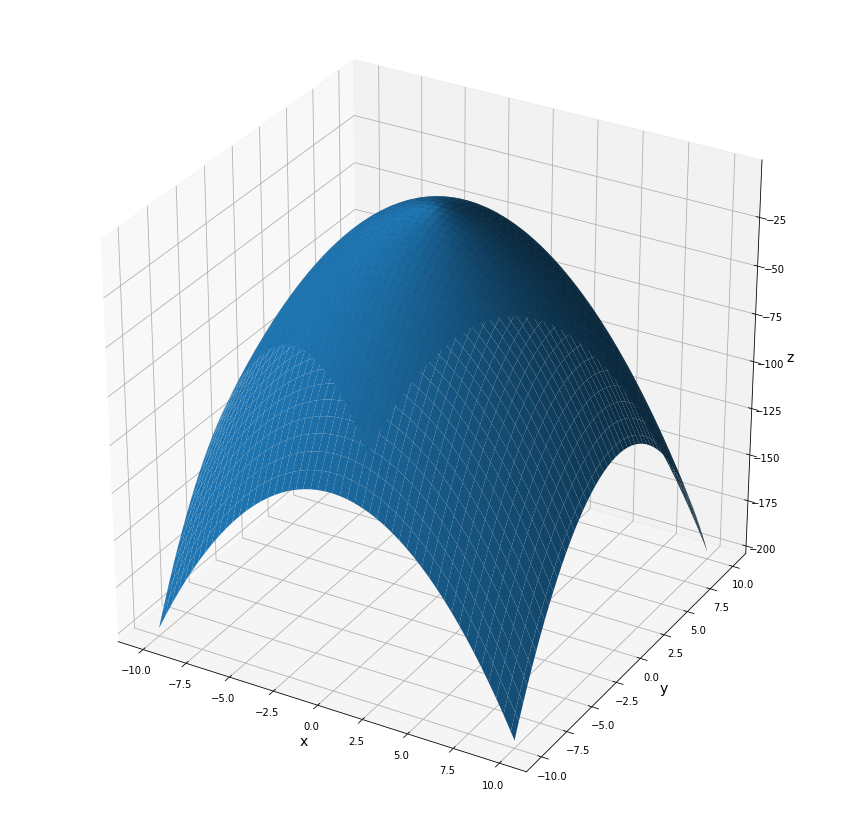

In [103]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
Z = f_prb5_v1(X, Y)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_surface(X, Y, Z)
#ax.plot_wireframe(X, Y, Z)
#ax.contour3D(X, Y, Z)

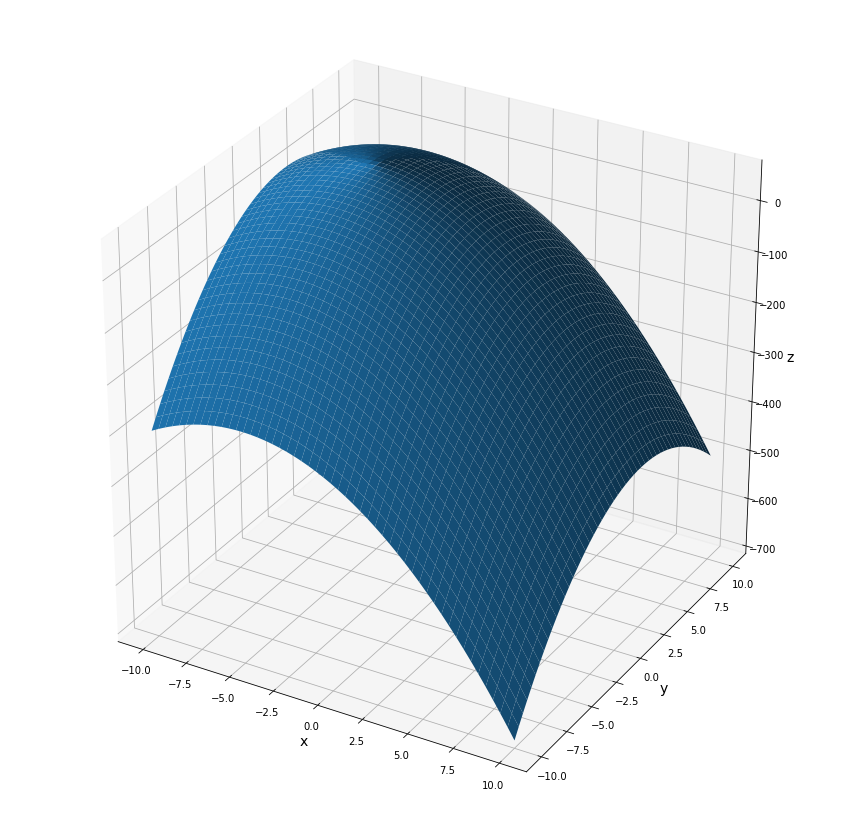

In [67]:
def f_prb5v2(x, y):
    #return -(8*(x**2)) - (2*(y**2))
    return -(2*(x**2)) - (20*x) - (2*(y**2)) + (10*y)

imprime_3d(f_prb5v2)

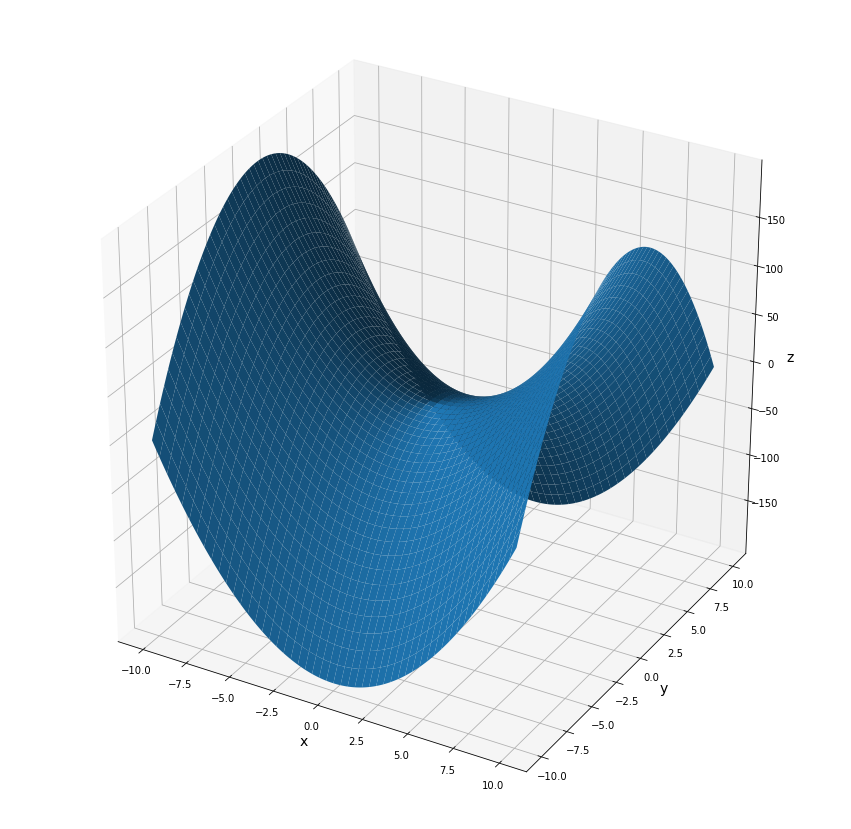

In [68]:
def f_prb5v3(x, y):
    return (2*(x**2)) - (2*(y**2))

imprime_3d(f_prb5v3)

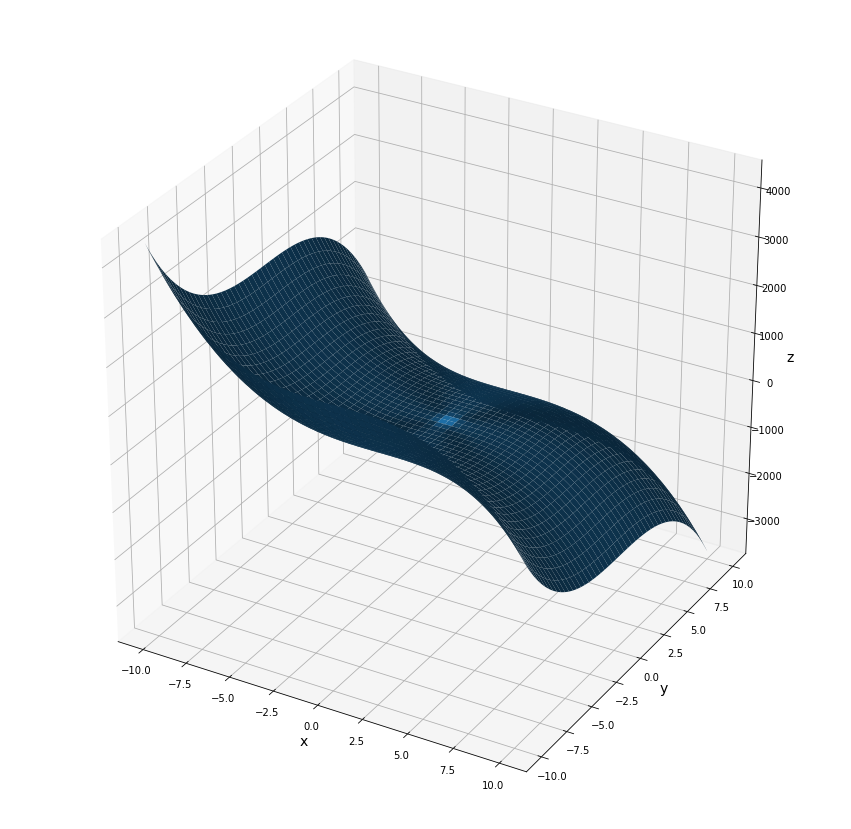

In [69]:
def f_prb5v4(x, y):
    return -(2*(x**3)) + (2*(x**2)) - (2*(y**3)) + (2*(y**2))
    #return -(2*(x**4)) + (4*(x**3)) - (5*(y**4)) + (5*(y**2))

imprime_3d(f_prb5v4)

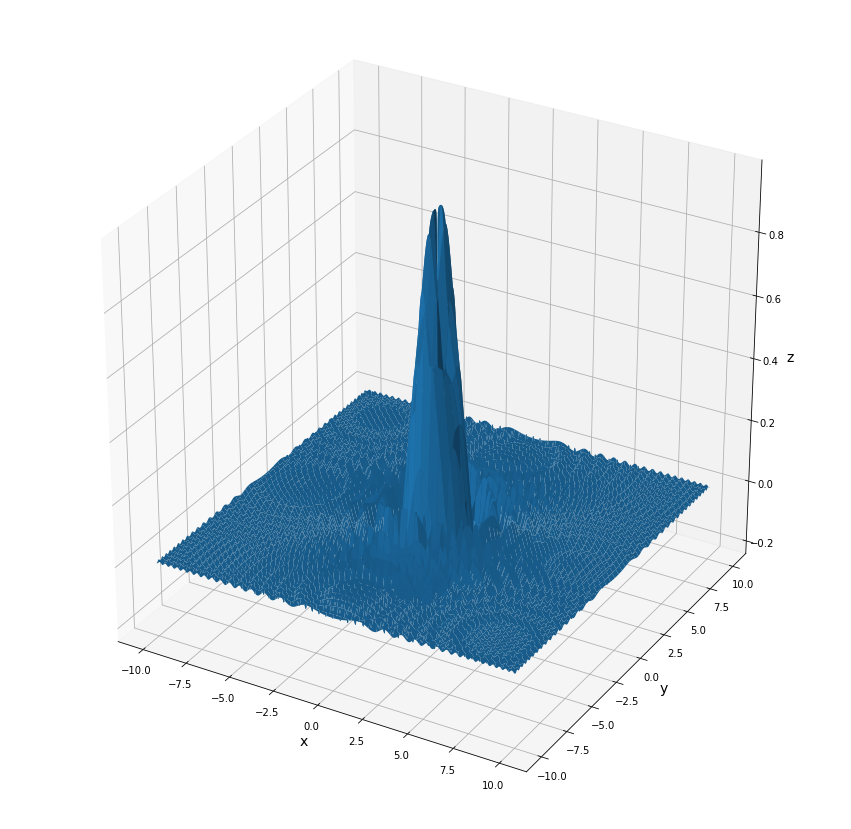

In [70]:
def f_prb5v5(x, y):
    return np.sin(x**2 + y**2) / ((2*(x**2)) + (y**2))
    #return np.sin(x**2 + y**2) * (x**2 + (0.3*(y**2)))

imprime_3d(f_prb5v5)

---
### Problema 5: Hill Climbing com função de 3 dimensões

O máximo de uma função de segundo grau será obtido pelo algoritmo de Hill-Climbing.

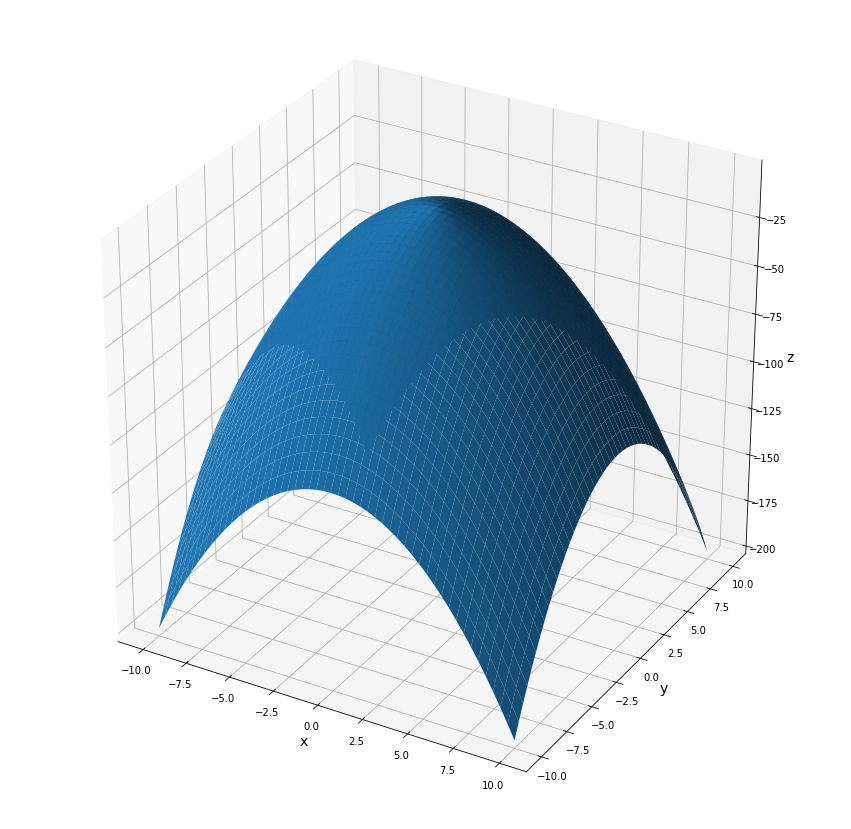

In [79]:
#imprime função, para comparação
imprime_3d(f_prb5_v1)

In [80]:
def hill_climbing_3d(f_objetivo, intervalo, iteracoes, step_size, op=operator.le, save=True):        
    all_values = []
    
    #gera um valor aletório como primeira solução
    best = [rd.uniform(intervalo[0], intervalo[1]), rd.uniform(intervalo[0], intervalo[1])]
    
    if(save):
        all_values.append(best)
    
    # run the hill climb
    for i in range(iteracoes):
        c1 = best[0] + (rd.uniform(-1, 1) * step_size)
        c2 = best[1] + (rd.uniform(-1, 1) * step_size)
        candidate = [c1, c2]
                
        # verifica se o ponto atual é melhor que o anterior 
        if(op(f_objetivo(candidate[0], candidate[1]), f_objetivo(best[0], best[1]))):
            best = candidate
            
        if(save):
            all_values.append(candidate)
            
    return best, f_objetivo(best[0], best[1]), all_values

First: [-5.56013657820521, 7.414646123547527]
Best: f([0.0025241257978090154, 0.0019005812305596947]) = -0.000010


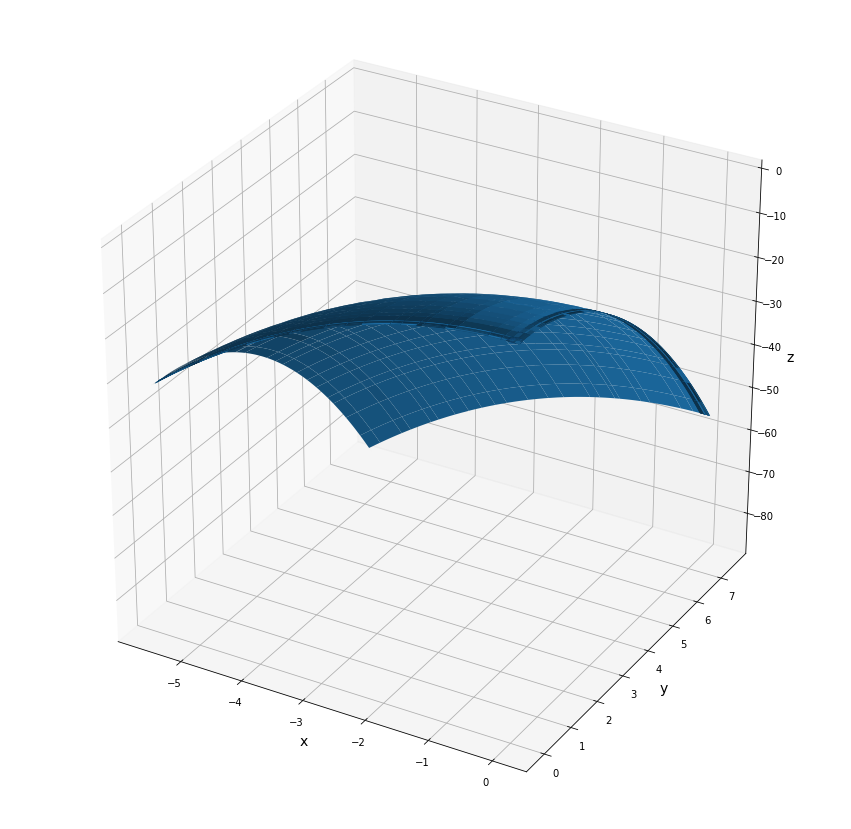

In [82]:
np.random.seed(5) #8

# execução do  hill climbing search
best, score, values = hill_climbing_3d(f_objetivo=f_prb5_v1, intervalo=[-10, 10], 
                                    iteracoes=1000, step_size=0.1, op=operator.ge)

#imprime melhor resultado
print('First:', values[0])
print('Best: f(%s) = %f' % (best, score))

#imprime resultados
x = [i[0] for i in values]
y = [i[1] for i in values]
imprime_3d(f_prb5_v1, x=x, y=y)

---
## Steepest Ascent Hill Climbing

### Problema 5: Hill Climbing com função de 3 dimensões

O máximo de uma função de segundo grau será obtido pelo algoritmo de Steepest Ascent Hill-Climbing.

In [83]:
def steepest_hill_climbing_3d(f_objetivo, intervalo, iteracoes=1000, 
                              amostras=10, step_size=0.1, op=operator.le, save=True):        
    all_values = []
    
    #gera um valor aletório como primeira solução
    best = [rd.uniform(intervalo[0], intervalo[1]), rd.uniform(intervalo[0], intervalo[1])]
    
    if(save):
        all_values.append(best)
    
    # run the hill climb
    for i in range(iteracoes):
        c1 = best[0] + (rd.uniform(-1, 1) * step_size)
        c2 = best[1] + (rd.uniform(-1, 1) * step_size)
        candidate = [c1, c2]
        
        for j in range(amostras):
            sc1 = best[0] + (rd.uniform(-1, 1) * step_size)
            sc2 = best[1] + (rd.uniform(-1, 1) * step_size)
            steep_cand = [sc1, sc2]
        
            if(op(f_objetivo(steep_cand[0], steep_cand[1]), f_objetivo(candidate[0], candidate[1]))):
                candidate = steep_cand
                
        # verifica se o ponto atual é melhor que o anterior 
        if(op(f_objetivo(candidate[0], candidate[1]), f_objetivo(best[0], best[1]))):
            best = candidate
            
        if(save):
            all_values.append(candidate)
            
    return best, f_objetivo(best[0], best[1]), all_values

First: [-5.56013657820521, 7.414646123547527]
Best: f([-0.0016610882267962162, 0.0010608397759142752]) = -0.000004


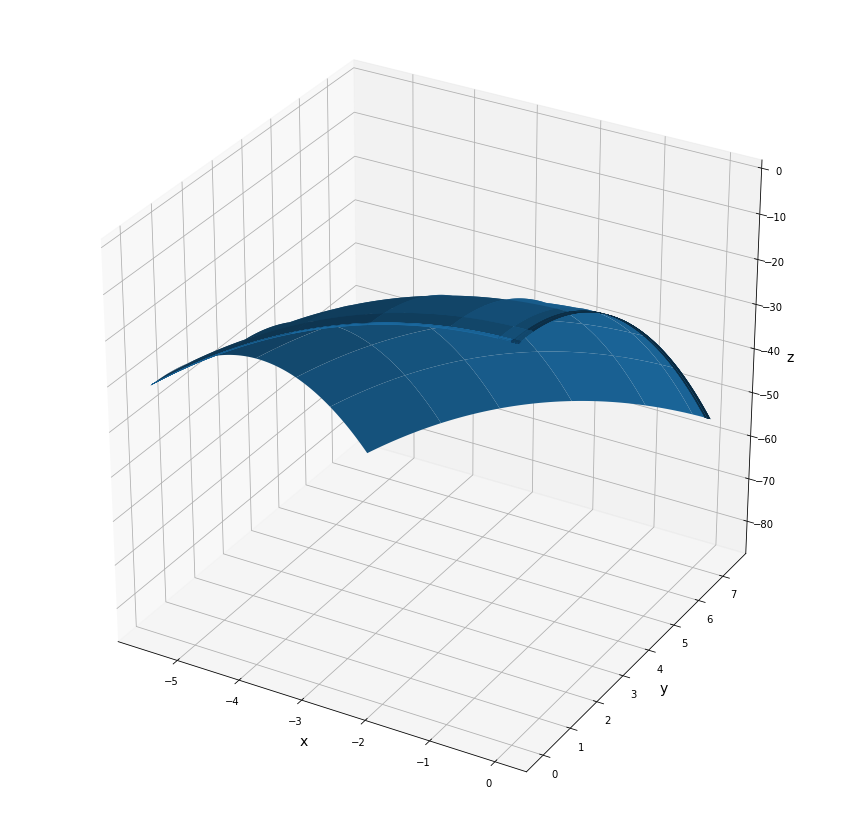

In [87]:
np.random.seed(5) #8

# execução do  hill climbing search
best, score, values = steepest_hill_climbing_3d(f_objetivo=f_prb5_v1, intervalo=[-10, 10], 
                                    iteracoes=1000, amostras=10, step_size=0.1, op=operator.ge)

#imprime melhor resultado
print('First:', values[0])
print('Best: f(%s) = %f' % (best, score))

#imprime resultados
x = [i[0] for i in values]
y = [i[1] for i in values]
imprime_3d(f_prb5_v1, x=x, y=y)

In [92]:
np.random.seed(5) #8

best_hc, score_hc, _ = hill_climbing_3d(f_objetivo=f_prb5_v1, intervalo=[-10, 10], 
                                    iteracoes=200, step_size=0.1, op=operator.ge)

best_shc, score_shc, _ = steepest_hill_climbing_3d(f_objetivo=f_prb5_v1, intervalo=[-10, 10], 
                                    iteracoes=200, amostras=10, step_size=0.1, op=operator.ge)

#imprime melhor resultado
print('Best Hill Climbing: f(%s) = %f' % (best_hc, score_hc))
print('Best Steepest Hill Climbing: f(%s) = %f' % (best_shc, score_shc))

Best Hill Climbing: f([-3.250165024439937, 3.899317523070617]) = -25.768250
Best Steepest Hill Climbing: f([0.0007879129275795991, -0.0016604590373438099]) = -0.000003


---
## Hill Climbing with Random Restart

### Problema 5: Hill Climbing com função de 3 dimensões

O máximo de uma função de segundo grau será obtido pelo algoritmo de Hill Climbing with Random Restart.

In [111]:
def random_hill_climbing_3d(f_objetivo, intervalo, time_epochs=10, max_time=500,
                            step_size=0.1, op=operator.le, save=True):        
    all_values = []
    
    #gera um valor aletório como primeira solução
    solution = [rd.uniform(intervalo[0], intervalo[1]), rd.uniform(intervalo[0], intervalo[1])]
    best = solution
    
    if(save):
        all_values.append(best)
    
    #executa por n épocas
    for t in range(time_epochs):
        tn = int(rd.uniform(0, max_time))
    
        # run the hill climb
        for i in range(tn):
            c1 = solution[0] + (rd.uniform(-1, 1) * step_size)
            c2 = solution[1] + (rd.uniform(-1, 1) * step_size)
            candidate = [c1, c2]

            # verifica se o ponto atual é melhor que o anterior 
            if(op(f_objetivo(candidate[0], candidate[1]), f_objetivo(solution[0], solution[1]))):
                solution = candidate

            if(save):
                all_values.append(candidate)
                
        # verifica se a solução no intervalo de tempo é melhor que a melhor solução
        if(op(f_objetivo(solution[0], solution[1]), f_objetivo(best[0], best[1]))):
            best = solution
        
        #define uma nova solução aleatória
        solution = [rd.uniform(intervalo[0], intervalo[1]), rd.uniform(intervalo[0], intervalo[1])]
            
    return best, f_objetivo(best[0], best[1]), all_values

First: [-5.56013657820521, 7.414646123547527]
Best: f([-0.016605469355854177, -0.004138086214469414]) = -0.000293


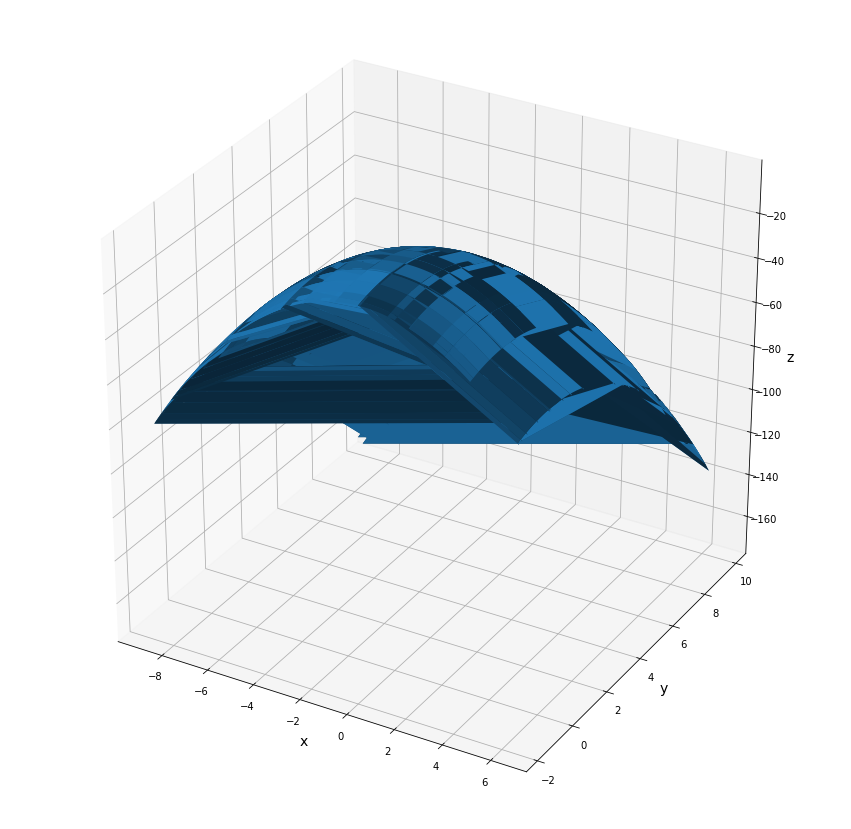

In [112]:
np.random.seed(5) #8

# execução do  hill climbing search
best, score, values = random_hill_climbing_3d(f_objetivo=f_prb5_v1, intervalo=[-10, 10], 
                                    time_epochs=10, max_time=500, step_size=0.1, op=operator.ge)

#imprime melhor resultado
print('First:', values[0])
print('Best: f(%s) = %f' % (best, score))

#imprime resultados
x = [i[0] for i in values]
y = [i[1] for i in values]
imprime_3d(f_prb5_v1, x=x, y=y)

First: [-5.56013657820521, 7.414646123547527]
Best: f([-0.05225769626921384, 0.5698918057463701]) = -0.327508


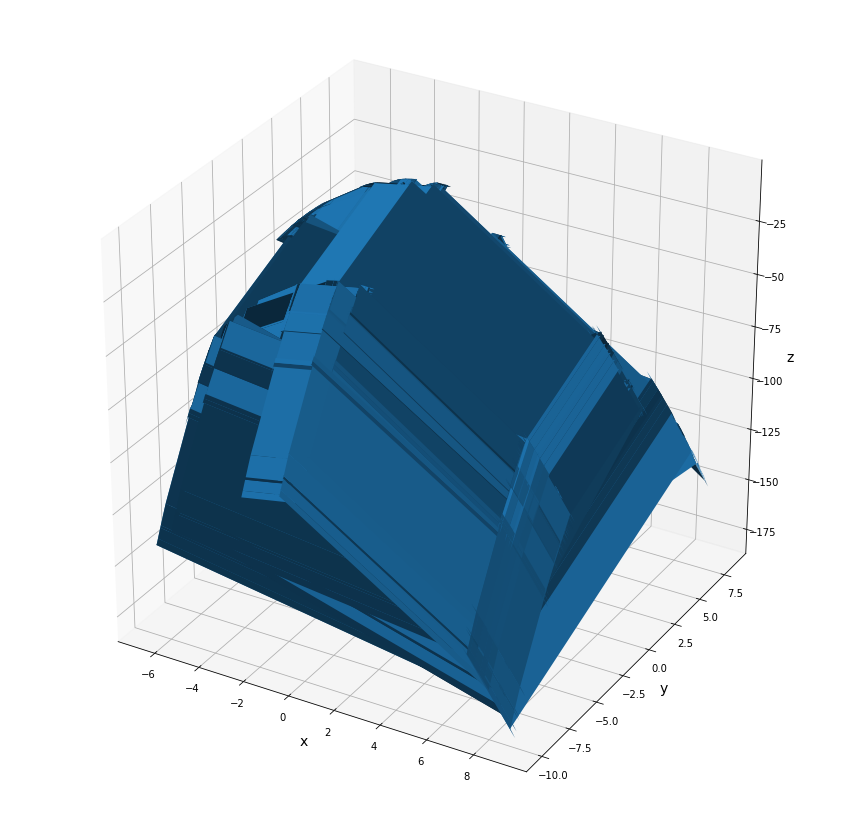

In [113]:
np.random.seed(5) #8

# execução do  hill climbing search
best, score, values = random_hill_climbing_3d(f_objetivo=f_prb5_v1, intervalo=[-10, 10], 
                                    time_epochs=10, max_time=100, step_size=0.1, op=operator.ge)

#imprime melhor resultado
print('First:', values[0])
print('Best: f(%s) = %f' % (best, score))

#imprime resultados
x = [i[0] for i in values]
y = [i[1] for i in values]
imprime_3d(f_prb5_v1, x=x, y=y)